### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Loading dataset

In [2]:
control = pd.read_csv("data/control_group.csv", sep=';')
test = pd.read_csv("data/test_group.csv", sep=';')



### Data Previewing and Cleaning

In [3]:
print(control.shape)
print(test.shape)

#control.head()
#test.head()

#control.info()
#test.info()


(30, 10)
(30, 10)


In [4]:

control.isnull().sum()
test.isnull().sum()


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [5]:
test.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [6]:

control.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


### comparison of Control and test data

| Metric             | Control Mean | Test Mean | 💡 Insight                                                                       |
| ------------------ | ------------ | --------- | -------------------------------------------------------------------------------- |
| **Spend \[USD]**   | 2,563        | 2,288     | Test spent **\~11% less** on average — cost-efficient.                           |
| **Impressions**    | 74,585       | 109,560   | Test got **\~47% more impressions** — great reach per \$ spent.                  |
| **Reach**          | 53,492       | 88,845    | Reach also much higher (\~66%) — test clearly more visible.                      |
| **Website Clicks** | 6,032        | 5,321     | Control had **higher clicks**, despite less reach — may indicate **better CTR**. |
| **Searches**       | 2,419        | 2,221     | Control slightly better — clickers more engaged.                                 |
| **View Content**   | 1,858        | 1,944     | Test slightly better — **stronger interest** after landing.                      |
| **Add to Cart**    | 882          | 1,300     | 🚀 Big win for test — **47% more** items added to cart.                          |
| **Purchases**      | 521          | 523       | Almost identical purchase levels.                                                |


### Calculating Key Metrics

In [7]:
# Add CTR (Click-through Rate)
control["CTR"] = control["# of Website Clicks"] / control["# of Impressions"]
test["CTR"] = test["# of Website Clicks"] / test["# of Impressions"]

# Add Conversion Rate
control["Conversion Rate"] = control["# of Purchase"] / control["# of Website Clicks"]
test["Conversion Rate"] = test["# of Purchase"] / test["# of Website Clicks"]

# Add Cost per Purchase
control["Cost per Purchase"] = control["Spend [USD]"] / control["# of Purchase"]
test["Cost per Purchase"] = test["Spend [USD]"] / test["# of Purchase"]


### Visualizing the Metrics

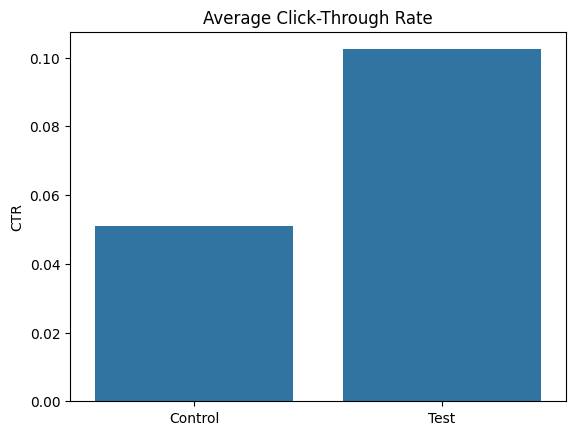

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# CTR comparison
sns.barplot(x=["Control", "Test"], y=[control["CTR"].mean(), test["CTR"].mean()])
plt.title("Average Click-Through Rate")
plt.ylabel("CTR")
plt.show()


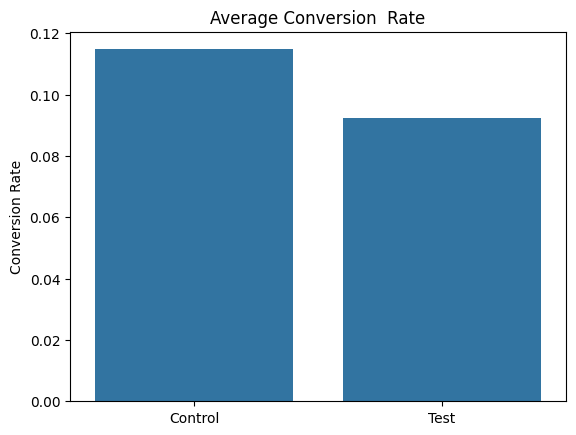

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conversion rate comparison
sns.barplot(x=["Control", "Test"], y=[control["Conversion Rate"].mean(), test["Conversion Rate"].mean()])
plt.title("Average Conversion  Rate")
plt.ylabel("Conversion Rate")
plt.show()


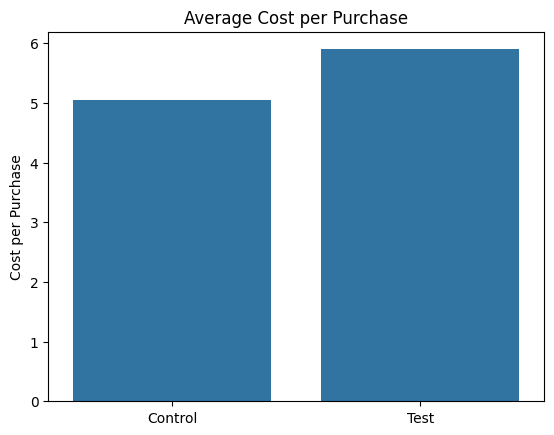

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conversion rate comparison
sns.barplot(x=["Control", "Test"], y=[control["Cost per Purchase"].mean(), test["Cost per Purchase"].mean()])
plt.title("Average Cost per Purchase")
plt.ylabel("Cost per Purchase")
plt.show()


### Metric Comparison and Insights

| Metric                                   | **Control** | **Test** | 🔍 **Insight**                                                                                            |
| ---------------------------------------- | ----------- | -------- | --------------------------------------------------------------------------------------------------------- |
| **CTR (Click-Through Rate)**             | `0.051`     | `0.102`  | ✅ **Test campaign doubled the CTR** → more users clicked ads → better ad creatives or audience targeting. |
| **Conversion Rate (Purchases / Clicks)** | `11.5%`     | `9.2%`   | ❌ Control had a **stronger conversion rate** → visitors were more likely to buy.                          |
| **Cost per Purchase**                    | `$5.05`     | `$5.90`  | ✅ Control was **more cost-effective** in generating actual sales.                                         |


### Statistical Testing

In [ ]:

control_clean = control.dropna(subset=["CTR", "Conversion Rate", "Cost per Purchase"])
test_clean = test.dropna(subset=["CTR", "Conversion Rate", "Cost per Purchase"])

from scipy.stats import ttest_ind

t_stat_ctr, p_val_ctr = ttest_ind(control_clean["CTR"], test_clean["CTR"], equal_var=False)
print(f"CTR t-test p-value: {p_val_ctr:.4f}")

t_stat_conv, p_val_conv = ttest_ind(control_clean["Conversion Rate"], test_clean["Conversion Rate"], equal_var=False)
print(f"Conversion Rate t-test p-value: {p_val_conv:.4f}")

t_stat_cost, p_val_cost = ttest_ind(control_clean["Cost per Purchase"], test_clean["Cost per Purchase"], equal_var=False)
print(f"Cost per Purchase t-test p-value: {p_val_cost:.4f}")


CTR t-test p-value: 0.0003
Conversion Rate t-test p-value: 0.1428
Cost per Purchase t-test p-value: 0.1946


#### Insights

The Test campaign clearly drives more clicks (better CTR).

However, conversion efficiency (purchases per click) and cost per purchase do not differ significantly.

So, while the Test campaign attracts more attention, it may not yet translate into more effective sales conversions.



### Chisquare test for purchase count

In [ ]:
from scipy.stats import chi2_contingency

control_purchases = control["# of Purchase"].sum()
control_non_purchases = control["# of Impressions"].sum() - control_purchases

test_purchases = test["# of Purchase"].sum()
test_non_purchases = test["# of Impressions"].sum() - test_purchases

contingency_table = [[control_purchases, control_non_purchases],
                     [test_purchases, test_non_purchases]]

chi2, p_val_chi, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p_val_chi:.4f}")


Chi-square test p-value: 0.0000


#### Insights

There is a highly significant difference in purchase counts between the Control and Test groups.

The Test campaign increases user engagement and overall sales volume, likely due to more impressions and reach.

However, once users click, their likelihood to convert and cost efficiency is about the same.

This suggests the Test campaign may be better at top-of-funnel reach and driving volume.


### Recommendations

Leverage Test Campaign Strengths: The Test campaign's ability to generate more clicks and purchases suggests strong top-of-funnel performance. Continue investing in the Test campaign's creative and targeting strategies to maximize reach and engagement.

Improve Post-Click Experience: Since conversion rates per click did not significantly improve, focus on optimizing the website or landing page experience to increase purchase conversion. A/B testing landing pages or streamlining the checkout process may help.

Analyze Segment Performance: Investigate whether certain user segments or channels perform better in the Test campaign to further refine targeting and resource allocation.

Monitor Cost Efficiency: Although cost per purchase was not significantly different, ongoing monitoring is recommended to maintain or improve cost-effectiveness as campaign spend scales.
